In [1]:
import pandas as pd
from scipy.interpolate import interp1d

atmos_filename = './resources/AltitudeDensityTable.csv'
try:
    df = pd.read_csv(atmos_filename, sep='\s+', skiprows=1, names=['Altitude', 'Atmospheric_density'])
except FileNotFoundError:
    raise FileNotFoundError(f"Unable to find file: {atmos_filename}")

rhoa = interp1d(df['Altitude'], df['Atmospheric_density'],
                        bounds_error=False, fill_value="extrapolate")

In [2]:
df[:7]

,Altitude,Atmospheric_density
0,0.0,1.225000
1,2000.0,1.006490
2,4000.0,0.819129
3,6000.0,0.659697
4,8000.0,0.525168
5,10000.0,0.412707
6,12000.0,0.310828


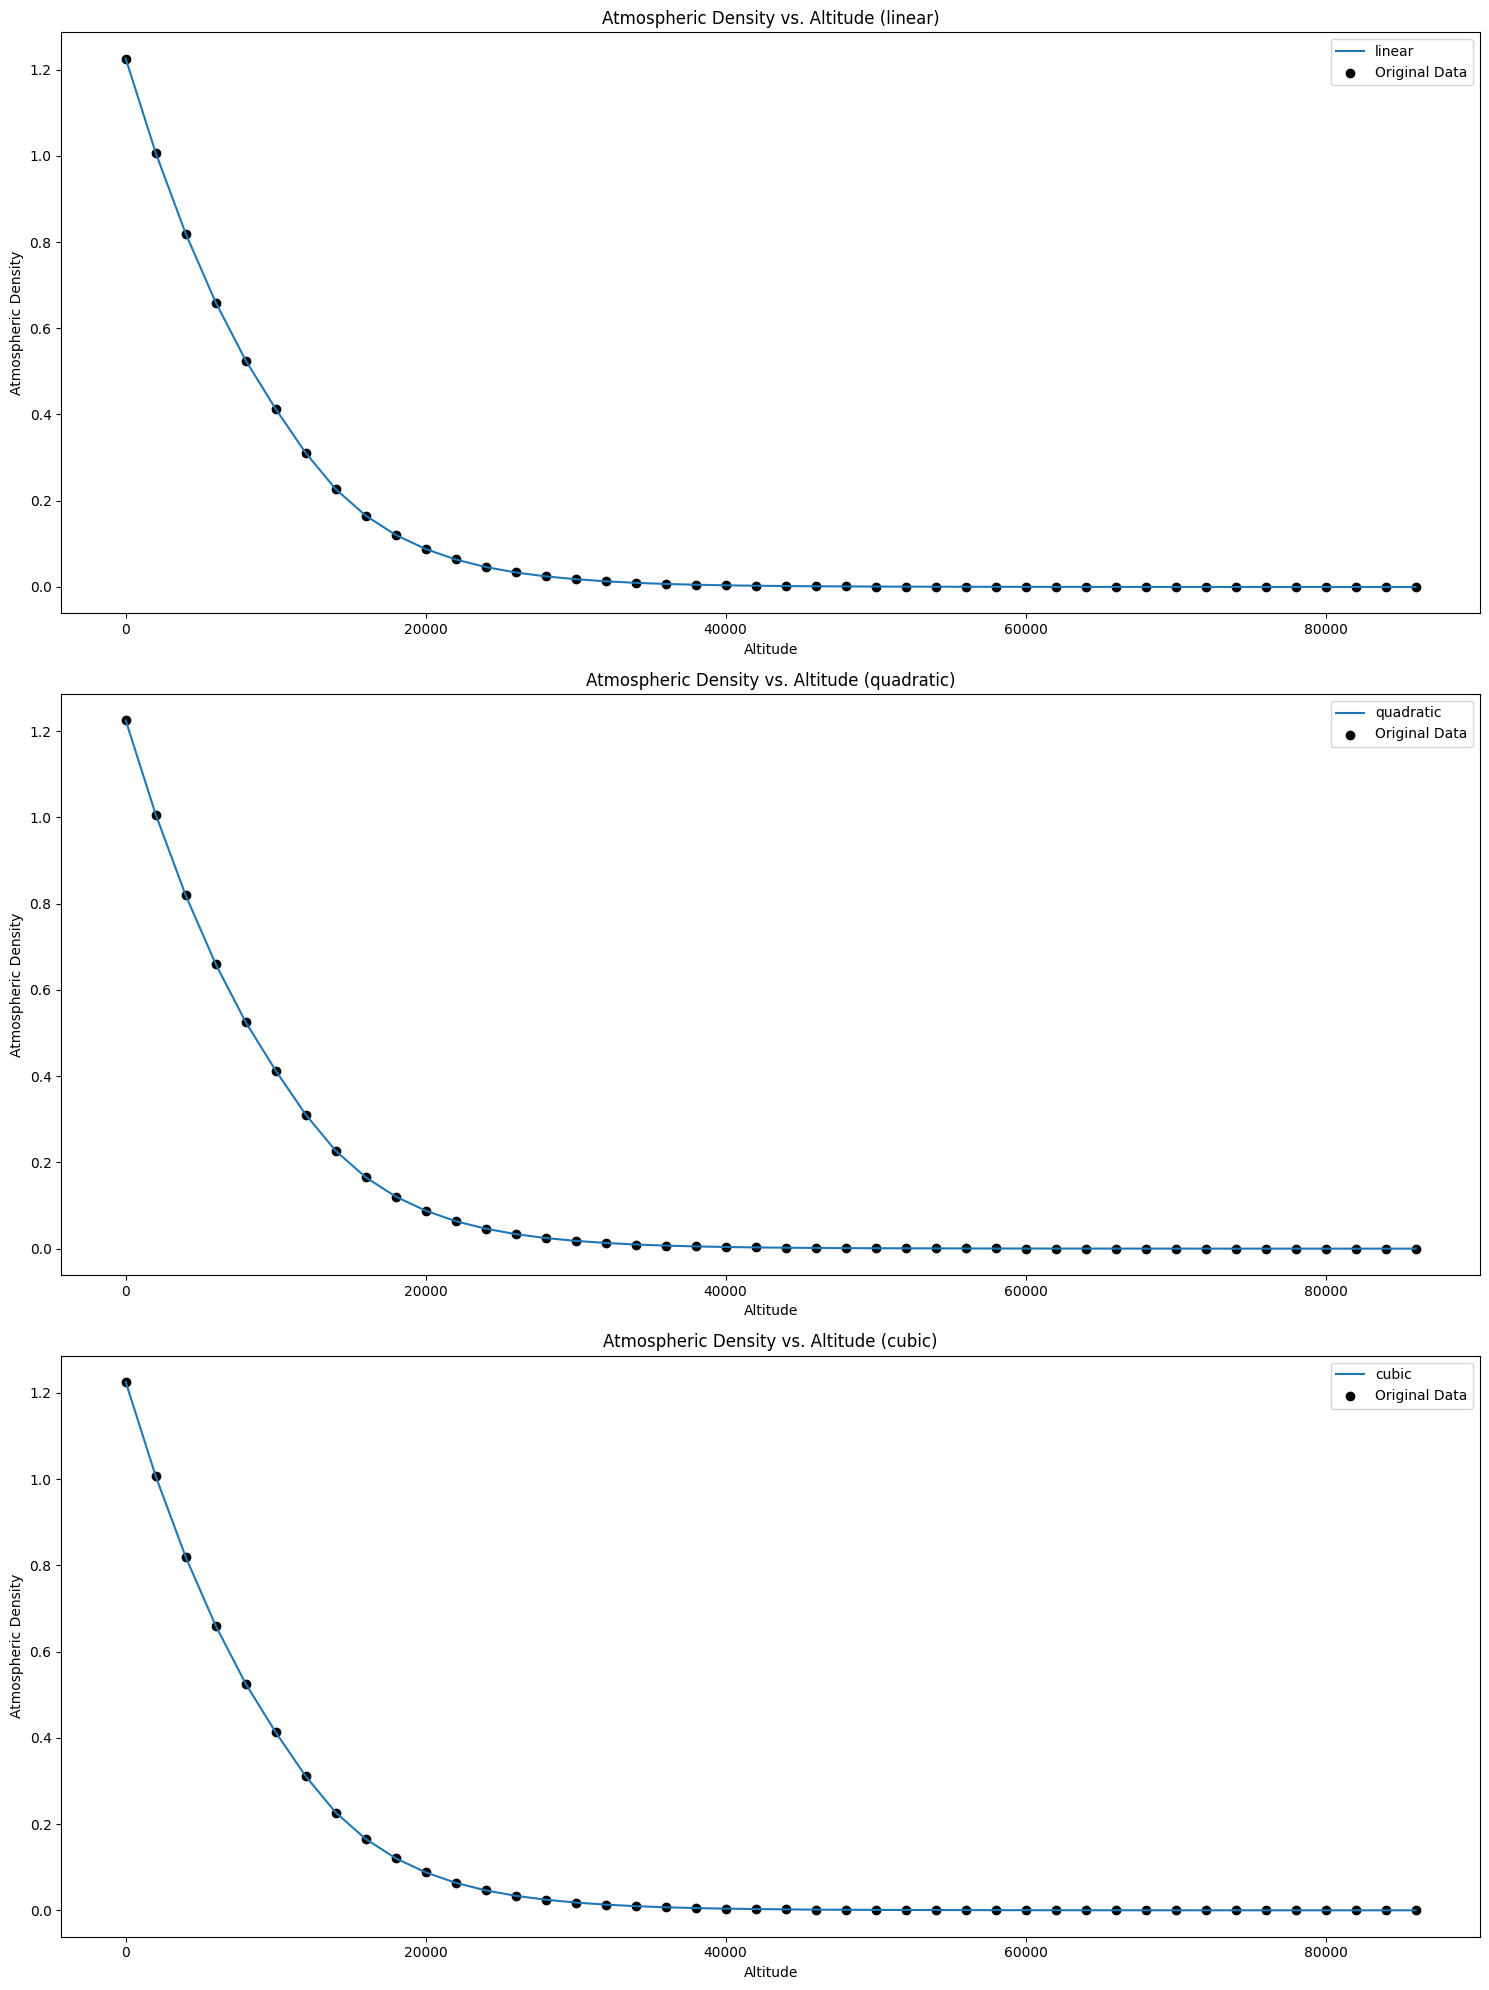

In [3]:
import matplotlib.pyplot as plt

methods = ['linear', 'quadratic', 'cubic']

fig, axs = plt.subplots(3, 1, figsize=(15, 20))

for ax, method in zip(axs, methods):
    interp_func = interp1d(df['Altitude'], df['Atmospheric_density'], kind=method, bounds_error=False, fill_value="extrapolate")
    ax.plot(df['Altitude'], interp_func(df['Altitude']), label=method)
    ax.scatter(df['Altitude'], df['Atmospheric_density'], color='black', label='Original Data')
    ax.set_xlabel('Altitude')
    ax.set_ylabel('Atmospheric Density')
    ax.set_title(f'Atmospheric Density vs. Altitude ({method})')
    ax.legend()

plt.tight_layout()
plt.show()

In [4]:
import deepimpact
# Initialise the Planet class
earth = deepimpact.Planet()

# Solve the atmospheric entry problem for a given set of input parameters
result = earth.solve_atmospheric_entry(radius=9.75, angle=20., strength=2e6, density=3300, velocity=19e3, dt=0.01)
result

,velocity,mass,angle,altitude,distance,radius,time
0,19000.000000,1.281198e+07,20.000000,100000.000000,0.000000,9.750000,0.00
1,19000.033362,1.281198e+07,19.998697,99935.018146,175.784259,9.750000,0.01
2,19000.066721,1.281198e+07,19.997394,99870.040237,351.572046,9.750000,0.02
3,19000.100076,1.281198e+07,19.996091,99805.066275,527.363362,9.750000,0.03
4,19000.133427,1.281198e+07,19.994788,99740.096259,703.158206,9.750000,0.04
...,...,...,...,...,...,...,...
41483,32.285747,2.086684e+06,89.942315,1.006626,214625.165934,102.418116,414.83
41484,32.285090,2.086684e+06,89.942315,0.683772,214625.166259,102.418116,414.84
41485,32.284434,2.086684e+06,89.942315,0.360924,214625.166584,102.418116,414.85
41486,32.283778,2.086684e+06,89.942315,0.038083,214625.166909,102.418116,414.86


In [5]:
# Calculate the kinetic energy lost per unit altitude and add it as a column to the result dataframe
result = earth.calculate_energy(result)
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,19000.000000,1.281198e+07,20.000000,100000.000000,0.000000,9.750000,0.00,-0.029565
1,19000.033362,1.281198e+07,19.998697,99935.018146,175.784259,9.750000,0.01,-0.029565
2,19000.066721,1.281198e+07,19.997394,99870.040237,351.572046,9.750000,0.02,-0.029561
3,19000.100076,1.281198e+07,19.996091,99805.066275,527.363362,9.750000,0.03,-0.029557
4,19000.133427,1.281198e+07,19.994788,99740.096259,703.158206,9.750000,0.04,-0.029553
...,...,...,...,...,...,...,...,...
41483,32.285747,2.086684e+06,89.942315,1.006626,214625.165934,102.418116,414.83,0.000033
41484,32.285090,2.086684e+06,89.942315,0.683772,214625.166259,102.418116,414.84,0.000033
41485,32.284434,2.086684e+06,89.942315,0.360924,214625.166584,102.418116,414.85,0.000033
41486,32.283778,2.086684e+06,89.942315,0.038083,214625.166909,102.418116,414.86,0.000033


In [6]:
result['dedz'].describe()

count    41488.000000
mean         0.296068
std          4.165317
min         -0.029565
25%          0.000051
50%          0.000096
75%          0.000250
max         91.444435
Name: dedz, dtype: float64

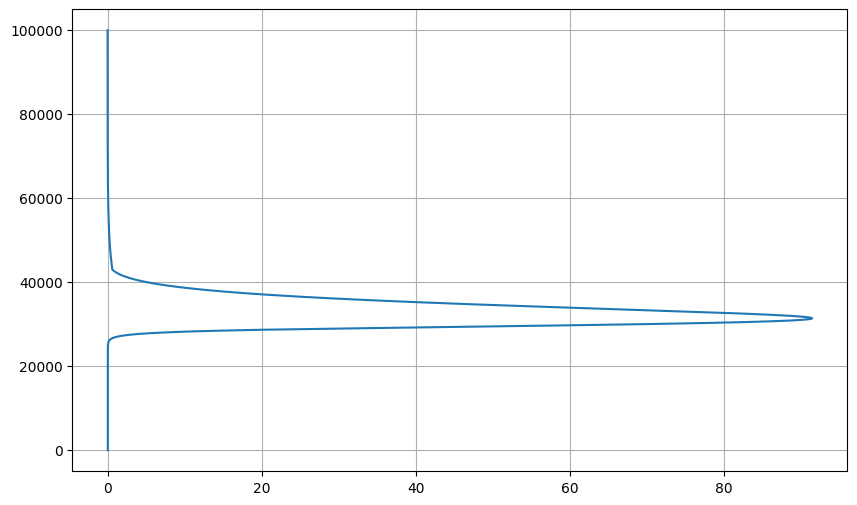

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(result['dedz'], result['altitude'])
plt.grid(True)
plt.show()

In [8]:
# Determine the outcomes of the impact event
outcome = earth.analyse_outcome(result)
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 91.44443453174864,
 'burst_altitude': 31433.094584961094,
 'burst_distance': 194004.12620945243,
 'burst_energy': 363.5921505058047}

In [9]:
filename = './resources/impact_parameter_list.csv'
df = pd.read_csv(filename)
df

,radius,angle,strength,density,velocity,entry latitude,entry longitude,bearing
0,33.240413,46.095606,7.419349e+06,3575.571395,19154.137019,52.978311,-2.493826,115.073454
1,34.672941,45.413923,1.195850e+07,3048.898239,17851.333374,53.025567,-2.473966,115.519650
2,34.752812,43.558525,7.081975e+06,2632.851855,20161.256803,53.025260,-2.520683,115.049389
3,35.116167,45.191798,1.584867e+07,2393.332832,20212.447872,53.019812,-2.514802,115.046368
4,34.295378,44.783683,1.283632e+07,3123.663614,18723.990445,53.007420,-2.481805,115.201585
5,35.688628,44.646468,5.161717e+06,2896.927989,20640.592567,52.961152,-2.521915,115.089292
6,35.207499,45.409136,8.950309e+06,3048.174106,18215.036532,53.072289,-2.430790,115.286773
7,34.743604,45.377470,9.175200e+06,3623.144131,19168.398576,52.988384,-2.472062,115.645726
8,36.064694,44.533119,1.567370e+07,2709.899784,19110.019350,52.967788,-2.498769,115.063144
9,34.787318,44.985457,6.508269e+06,2509.297781,20557.647542,52.990164,-2.457290,115.094098


In [10]:
import deepimpact

print('=====================Start Solver=====================')
#######################
#   Airburst Solver   #
#######################

# Initialise the Planet class
earth = deepimpact.Planet()

# Solve the atmospheric entry problem for a given set of input parameters
result = earth.solve_atmospheric_entry(radius=35, angle=45,
                                       strength=1e7, density=3000,
                                       velocity=19e3)

# Calculate the kinetic energy lost per unit altitude and add it
# as a column to the result dataframe
result = earth.calculate_energy(result)

# Determine the outcomes of the impact event
outcome = earth.analyse_outcome(result)
print('=====================Finish Solver=====================\n')

#####################
#   Damage Mapper   #
#####################

print('=====================Start Mapper=====================')
# Calculate the blast location and damage radius for several pressure levels
pressures = [1e3, 4e3, 30e3, 50e3]

blast_lat, blast_lon, damage_rad = deepimpact.damage_zones(outcome,
                                                           lat=55.2, lon=-2.5,
                                                           bearing=217.,
                                                           pressures=pressures)

# Plot a circle to show the limit of the lowest damage level
damage_map = deepimpact.plot_circle(blast_lat, blast_lon, damage_rad, pressures)
damage_map.save("damage_map.html")
print('=====================Finish Mapper=====================\n')

print('=====================Start Locater=====================')
# The GeospatialLocator tool
locator = deepimpact.GeospatialLocator()

# Find the postcodes in the damage radii
postcodes = locator.get_postcodes_by_radius((blast_lat, blast_lon),
                                            radii=damage_rad)

# Find the population in each postcode
population = locator.get_population_by_radius((blast_lat, blast_lon),
                                              radii=damage_rad)

# Print the number of people affected in each damage zone
print("Pressure |      Damage | Population")
print("   (kPa) | radius (km) |   affected")
print("-----------------------------------")
for pop, rad, zone in zip(population, damage_rad, pressures):
    print(f"{zone/1e3:8.0f} | {rad/1e3:11.1f} | {pop:10,.0f}")

# Print the postcodes inside the highest damage zone
print("Postcodes in the highest damage zone:")
print(*postcodes[-1])
print('=====================Finish Locater=====================\n')

print('=====================Start Impact Risk=====================')
# Example usage of impact_risk function
# Uses the default file impact_parameter_list.csv in the resources folder
probability, population = deepimpact.impact_risk(earth, pressure=30e3)
print(probability.head())
print("Total population affected: " +
      f"{population['mean']:,.0f} +/- {population['stdev']:,.0f}")
print('=====================Finish Impact Risk=====================')

=====================Start Solver=====================
=====================Finish Solver=====================

=====================Start Mapper=====================
=====================Finish Mapper=====================

=====================Start Locater=====================
Pressure |      Damage | Population
   (kPa) | radius (km) |   affected
-----------------------------------
       1 |       155.5 | 14,167,646
       4 |        51.6 |    476,516
      30 |        10.9 |      7,859
      50 |         4.7 |        167
Postcodes in the highest damage zone:
CA130RR CA130RS CA130RT CA130RU CA130SU CA139FG CA139UU CA139UX CA139UY CA139UZ CA139XA CA233AU
=====================Finish Locater=====================

=====================Start Impact Risk=====================
         probability
CV130AA          0.4
CV130AB          0.4
CV130AD          0.5
CV130AE          0.8
CV130AG          0.6
Total population affected: 275,500 +/- 160,634
=====================Finish Impact Risk====